<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/7_2_DeepNeuralNetwork_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Deep Neural Network*** \

층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행. 2개 이상의 층을 추가 가능.


In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


***Hidden Layer 은닉층*** \

입력층과 출력층 사이의 모든 층. \

은닉층에는 주황색 원으로 활성화 함수가 표시되어 있음. 신경망 층의 선형 방정식의 계산 값에 적용하는 함수.
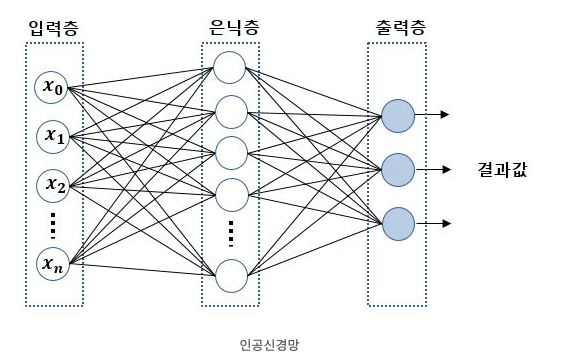 \

출력층에 사용되는 활성화 함수 (분류) : 시그모이드 함수 , 소프트맥스 함수 \

은닉층의 활성화 함수는 비교적 자유롭다.

분류 문제는 클래스에 대한 확률을 출력하기 위해 활성화 함수를 사용. 그러므로 회귀는 필요하지 않음.

**은닉층에 활성화 함수를 사용하는 이유**는, 은닉층에 선형적인 산수만 사용할때, 은닉층이 필요없게됨. a * 4 + 2 = b, b * 3 -5 = c >> a * 12 + 1 =c. b(은닉층) 없어짐.

그러므로 비선형적으로 조금 비틀어 주어야 은닉층의 역할을 할 수 있음.

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) #첫번째 층은 input_shape 매개변수 무조건 지정.
#은닉층의 뉴런 개수는 적어도 출력층의 뉴런보다는 많게.
dense2 = keras.layers.Dense(10, activation='softmax') #출력층 뉴런 10개, 10개의 클래스.

model = keras.Sequential([dense1, dense2]) #출력층을 가장 마지막에. 순서대로.


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***층을 추가하는 다른 방법*** \

Sequential 클래스의 생성자 안에서 바로 dense 클래스의 객체를 만들기.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='fashionMNIST')

model.summary()

Model: "fashionMNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential() #add. 메소드 사용하기
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5679 - accuracy: 0.8059
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4113 - accuracy: 0.8520
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3763 - accuracy: 0.8629
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3529 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3353 - accuracy: 0.8778


***ReLU Function*** \

시그모이드 함수의 단점. 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에, 올바른 출력을 만드는데 신속하게 대응 불가. 특히 층이 많으면 많을수록 효과가 누적. >> 렐루 함수. \

입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시킴. 음수일 경우 0으로 만듬. max(0,z)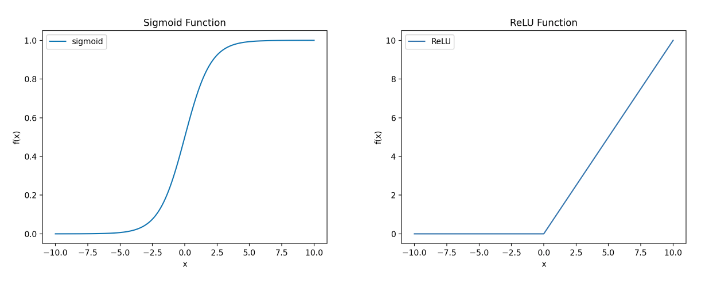

***Flatten class*** \

배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할. >> 사진 데이터를 1차원으로 펼치는것과 같은 역할(reshape()). \

가중치나 절편없음.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) #첫번째 dense의 input_shape parameter를 flatten층으로 옮김.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42) #flatten class가 있으므로, reshape하지 않음.

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5361 - accuracy: 0.8120
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8564
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3585 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3362 - accuracy: 0.8790
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3188 - accuracy: 0.8861


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3571 - accuracy: 0.8773


[0.35712772607803345, 0.8773333430290222]

***Optimizer*** \

hyperparameter : 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터. \

신경망에는 여러 개의 은닉층을 추가해야함. 추가하라 은닉충으이 개수는 모델이 학습하는 것이 아니라 우리가 지정해야되는 하이퍼파라미터. + 은닉층의 뉴런 개수도 하이퍼파라미터. 선택해야할 활성화 함수도. 층의 종류. \

케라스는 기본적으로 미니배치 경사 하강법. 미니배치 수 32개. fit() 메서드의 batch_size() 매개변수에서 조정가능. \

케라스는 여러개의 경사 하강법 알고리즘 사용. 기본은 RMSprop 경사 하강법. Optimizer >> 경사 하강법 알고리즘들. (SGD 등 많음) \

모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾아야한다!

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 원래는 sgd 지정해야하지만, 'sgd'쓰면 자동으로 만들어줌
# sgd = optimizers.SGD()
# model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')
#학습률을 바꾸고싶다면, learning_rate 매개변수에 지정.
sgd = keras.optimizers.SGD(learning_rate=0.1)

***여러가지 종류의 옵티마이저***

모두 SGD 클래스에서 제공. \

***Momentum parameter***. 보통 0.9로 지정. 기본 0. 0보다 큰 값으로 지정하면 이전의 그레디언트를 가속도처럼 사용. SGD의 높은 편차를 줄이고, 관련 없는 방향의 변동을 줄여줌. \

***Nesterov Momentum Optimization***. False에서 True로. 모멘텀 최적화를 2번 반복하여 구현. 기본적으로 더 나은 성능.

***Adaptive Learning Rate***. 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있음. 안정적으로 최적점에 수렴할 가능성 높음. 학습률 매개변수를 튜닝하는 수고 덜 수 있다. >> Adagrad, RMSprop

***Adam*** \
모멘텀 최적화와 RMSprop의 장점을 접목한 것. 적응적 학습률을 사용하는 3개의 클래스는 learning_rate의 기본값 0.001사용.




[설명](https://heeya-stupidbutstudying.tistory.com/entry/ML-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%97%90%EC%84%9C%EC%9D%98-Optimizer-%EC%97%AD%ED%95%A0%EA%B3%BC-%EC%A2%85%EB%A5%98)

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) #Nesetrov Momentum Optimization

adagrad = keras.optimizers.Adagrad() #adagrad
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

rmsprop = keras.optimizers.RMSprop() #rmsprop
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #adam
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5252 - accuracy: 0.8183
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3916 - accuracy: 0.8607
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3490 - accuracy: 0.8732
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3250 - accuracy: 0.8815
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3051 - accuracy: 0.8874


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8804


[0.3312905430793762, 0.8804166913032532]